In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering Example

In [7]:
df=pd.read_csv(r'..\Datasets\simp_clust.csv',index_col=0)
df.head()

,X1,X2
Name,,
A,23,150
B,24,167
C,67,256
D,65,240
E,12,102


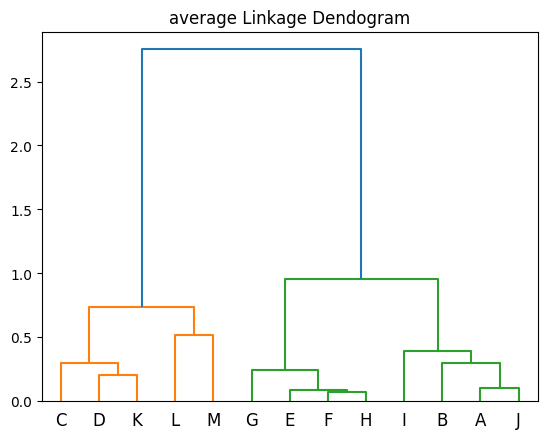

In [10]:
scaler=StandardScaler().set_output(transform='pandas')
df_scaled=scaler.fit_transform(df)
link='average'
mergings=linkage(df_scaled,method=link)
dendo=dendrogram(mergings,labels=list(df_scaled.index))
plt.title(link+" Linkage"+" Dendogram")
plt.show()

# For Milk Dataset

## Using scipy

In [11]:
milk_df=pd.read_csv(r'..\Datasets\milk.csv',index_col=0)
milk_df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [13]:
scaler=StandardScaler().set_output(transform='pandas')
milk_scaled=scaler.fit_transform(milk_df)
milk_scaled.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,0.948806,-1.009291,-0.903208,1.542217,-1.037554
ORANGUTAN,0.821407,-1.344603,-0.660619,1.040773,-1.259945
MONKEY,0.813445,-1.121062,-0.738247,1.263637,-1.381249
DONKEY,0.964731,-1.260775,-0.864394,1.152205,-0.936467
HIPPO,0.972694,-1.568145,-0.563583,0.149319,-1.542988


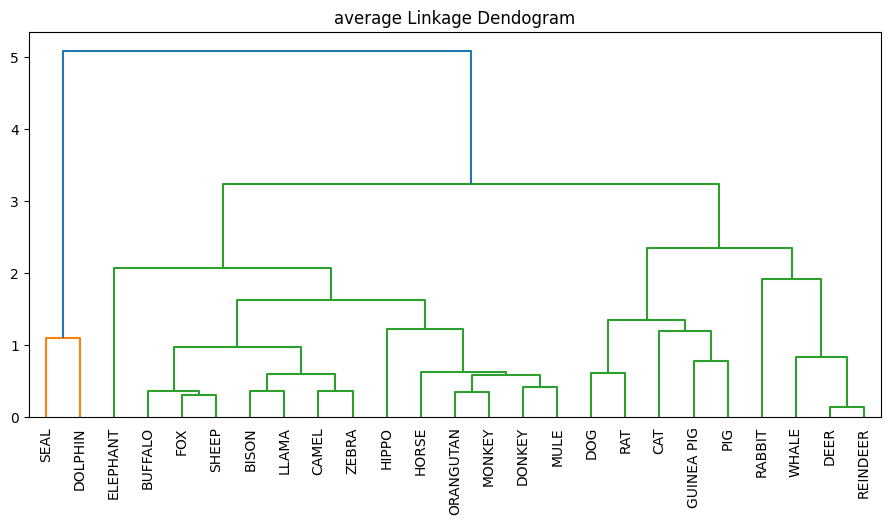

In [21]:
link='average'
merging=linkage(milk_scaled,link)
plt.figure(figsize=(11,5))
dendrogram(merging,labels=list(milk_scaled.index))
plt.title(link+" Linkage"+" Dendogram")
plt.xticks(rotation=90)
plt.show()

## Using `sklearn`

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [26]:
clust=AgglomerativeClustering(n_clusters=3)
clust.fit(milk_scaled)
silhouette_score(milk_scaled,clust.labels_)

np.float64(0.5391595072079531)

In [30]:
ks=[2,3,4,5,6,7]
linkage=['ward','single','complete','average']
scores=[]
for i in ks:
    for link in linkage:
        clust=AgglomerativeClustering(n_clusters=i,linkage=link)
        clust.fit(milk_scaled)
        scores.append([i,link,silhouette_score(milk_scaled,clust.labels_)])
score_df=pd.DataFrame(scores,columns=['clusters','linkage','score'])
score_df.sort_values(by='score',ascending=False,inplace=True)
score_df.head()

,clusters,linkage,score
4,3,ward,0.539160
0,2,ward,0.525851
3,2,average,0.518685
1,2,single,0.518685
7,3,average,0.487576


# For Nurient dataset

In [31]:
nutrient_df=pd.read_csv(r'..\Datasets\nutrient.csv',index_col=0)
nutrient_df.head()

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


In [32]:
scaler=StandardScaler().set_output(transform='pandas')
nutrient_scaled=scaler.fit_transform(nutrient_df)
nutrient_scaled.head()

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,1.335059,0.239681,1.314297,-0.456581,0.152385
HAMBURGER,0.378515,0.479361,0.318516,-0.456581,0.222121
BEEF ROAST,2.140569,-0.958723,2.310078,-0.482699,-0.266028
BEEF STEAK,1.687470,0.000000,1.676399,-0.456581,0.152385
BEEF CANNED,-0.275962,0.719042,-0.315163,-0.352109,0.919476


In [33]:
ks=[2,3,4,5,6,7]
linkage=['ward','single','complete','average']
scores=[]
for i in ks:
    for link in linkage:
        clust=AgglomerativeClustering(n_clusters=i,linkage=link)
        clust.fit(nutrient_scaled)
        scores.append([i,link,silhouette_score(nutrient_scaled,clust.labels_)])
score_df=pd.DataFrame(scores,columns=['clusters','linkage','score'])
score_df.sort_values(by='score',ascending=False,inplace=True)
score_df.head()

,clusters,linkage,score
1,2,single,0.448342
5,3,single,0.445319
7,3,average,0.445319
8,4,ward,0.415801
10,4,complete,0.415801
